<a href="https://colab.research.google.com/github/misalsachin/deep_learning-RNN/blob/master/stock_market_prediction_STACK_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/misalsachin/deep_learning-RNN.git

fatal: destination path 'deep_learning-RNN' already exists and is not an empty directory.


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/deep_learning-RNN/shareprice.csv')

In [ ]:
df.shape

(737, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/7/2017,815.799988,815.799988,806.275024,808.174988,795.897461,4360036
1,8/8/2017,809.000000,810.525024,793.400024,801.275024,789.102295,5011136
2,8/9/2017,800.750000,810.000000,792.500000,799.400024,787.255798,4771286
3,8/10/2017,796.525024,803.325012,788.974976,792.174988,780.140503,4657686
4,8/11/2017,775.474976,790.000000,766.500000,773.125000,761.379883,7770128


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
732,7/31/2020,2114.500000,2129.000000,2052.800049,2067.100098,2067.100098,34593133
733,8/3/2020,2051.300049,2057.000000,2003.099976,2009.000000,2009.000000,21559142
734,8/4/2020,2020.599976,2167.000000,2000.250000,2150.600098,2150.600098,42476932
735,8/5/2020,2169.000000,2196.000000,2118.300049,2126.449951,2126.449951,34404810
736,8/6/2020,2157.000000,2167.699951,2107.800049,2134.100098,2134.100098,22762545


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0       808.174988
1       801.275024
2       799.400024
3       792.174988
4       773.125000
          ...     
732    2067.100098
733    2009.000000
734    2150.600098
735    2126.449951
736    2134.100098
Name: Close, Length: 737, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

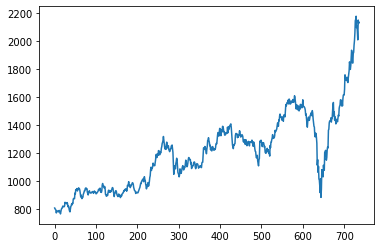

In [ ]:
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0       808.174988
1       801.275024
2       799.400024
3       792.174988
4       773.125000
          ...     
732    2067.100098
733    2009.000000
734    2150.600098
735    2126.449951
736    2134.100098
Name: Close, Length: 737, dtype: float64

In [ ]:
df1.shape

(737,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(737, 1)

In [ ]:
print(df1)

[[0.02982377]
 [0.02493581]
 [0.02360755]
 [0.01848931]
 [0.00499424]
 [0.01448686]
 [0.01202513]
 [0.01237933]
 [0.01531922]
 [0.01142301]
 [0.00988224]
 [0.01767467]
 [0.01271585]
 [0.01218455]
 [0.        ]
 [0.01131673]
 [0.02208447]
 [0.02761001]
 [0.02876116]
 [0.03557955]
 [0.04011335]
 [0.03685466]
 [0.03600461]
 [0.03671302]
 [0.04085716]
 [0.05874435]
 [0.05509605]
 [0.05364384]
 [0.05630035]
 [0.05137694]
 [0.05743382]
 [0.05332505]
 [0.03635882]
 [0.03929867]
 [0.03827147]
 [0.02343045]
 [0.01443372]
 [0.01050209]
 [0.0228637 ]
 [0.03738597]
 [0.04114054]
 [0.05027892]
 [0.04574516]
 [0.05463562]
 [0.052475  ]
 [0.07556893]
 [0.07819003]
 [0.07843796]
 [0.07670236]
 [0.10514478]
 [0.10188614]
 [0.12303196]
 [0.11913574]
 [0.12313824]
 [0.12845127]
 [0.11601875]
 [0.12498007]
 [0.12381119]
 [0.13209952]
 [0.12788451]
 [0.12696359]
 [0.11789604]
 [0.09961924]
 [0.08623039]
 [0.09522713]
 [0.08343219]
 [0.07733994]
 [0.08545117]
 [0.08332596]
 [0.09760026]
 [0.10330294]
 [0.10

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(479, 258)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(428, 50)
(428,)


(None, None)

In [ ]:
X_train

array([[0.02982377, 0.02493581, 0.02360755, ..., 0.07843796, 0.07670236,
        0.10514478],
       [0.02493581, 0.02360755, 0.01848931, ..., 0.07670236, 0.10514478,
        0.10188614],
       [0.02360755, 0.01848931, 0.00499424, ..., 0.10514478, 0.10188614,
        0.12303196],
       ...,
       [0.45265213, 0.45534401, 0.43837778, ..., 0.36413707, 0.36325156,
        0.3651643 ],
       [0.45534401, 0.43837778, 0.40904986, ..., 0.36325156, 0.3651643 ,
        0.36442044],
       [0.43837778, 0.40904986, 0.37784466, ..., 0.3651643 , 0.36442044,
        0.36130345]])

In [ ]:
print(X_test.shape), print(ytest.shape)

(207, 50)
(207,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape

(428, 50, 1)

In [ ]:
X_test.shape

(207, 50, 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense


In [ ]:
model=Sequential()

In [ ]:
model=Sequential()
model.add(LSTM(30,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(20,return_sequences=True))
model.add(LSTM(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 30)            3840      
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 20)            4080      
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 11,221
Trainable params: 11,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 59ms/step - loss: 0.0014 - val_loss: 0.0164
Epoch 2/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0013 - val_loss: 0.0161
Epoch 3/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0013 - val_loss: 0.0147
Epoch 4/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0013 - val_loss: 0.0163
Epoch 5/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0013 - val_loss: 0.0138
Epoch 6/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0013 - val_loss: 0.0151
Epoch 7/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0013 - val_loss: 0.0126
Epoch 8/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0013 - val_loss: 0.0156
Epoch 9/100
7/7 [==============================] - 0s 54ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 10/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0012 - val_loss: 0.0127
Epoch 11/100
7/7 [=

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1107.4584614968035

In [ ]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1441.2177110944288

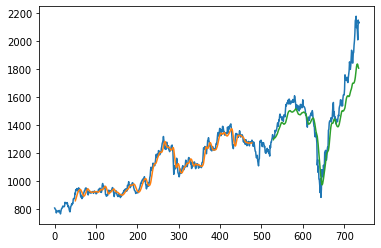

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

258

In [ ]:
x_input=test_data[208:].reshape(1,-1)
x_input.shape

(1, 50)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.4946958591527122,
 0.5343309990926703,
 0.5452049745913423,
 0.5494200269296885,
 0.5764456368817383,
 0.577791534044299,
 0.5691490464663715,
 0.5462322113310298,
 0.5710263326539318,
 0.5466217815240795,
 0.5828212680790559,
 0.601062657338048,
 0.6032940588335696,
 0.6016293283976899,
 0.6303551229623041,
 0.7036748817314566,
 0.6942885358020725,
 0.6764013482762645,
 0.6813247183641604,
 0.6742761378771587,
 0.6911007202034136,
 0.677995256075594,
 0.6645001360379057,
 0.6882316521612546,
 0.7043478310211408,
 0.7238643805229625,
 0.7691313797340045,
 0.7490480720389143,
 0.7310192385316026,
 0.749614829523779,
 0.7877269707261809,
 0.8280705134241044,
 0.8153192510294691,
 0.7636057979845594,
 0.7631807729064213,
 0.8115646779459456,
 0.8173736380836212,
 0.8539626948316474,
 0.8769503526035396,
 0.9150624938059415,
 0.9776498359243,
 0.9847693254730745,
 1.0,
 0.9425838643390532,
 0.9512265254758296,
 0.9216506807549394,
 0.8804923699353826,
 0.9808023701967197,
 0.96369432234

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<30):
    
    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7354639]
51
1 day input [0.534331   0.54520497 0.54942003 0.57644564 0.57779153 0.56914905
 0.54623221 0.57102633 0.54662178 0.58282127 0.60106266 0.60329406
 0.60162933 0.63035512 0.70367488 0.69428854 0.67640135 0.68132472
 0.67427614 0.69110072 0.67799526 0.66450014 0.68823165 0.70434783
 0.72386438 0.76913138 0.74904807 0.73101924 0.74961483 0.78772697
 0.82807051 0.81531925 0.7636058  0.76318077 0.81156468 0.81737364
 0.85396269 0.87695035 0.91506249 0.97764984 0.98476933 1.
 0.94258386 0.95122653 0.92165068 0.88049237 0.98080237 0.96369432
 0.96911371 0.73546392]
1 day output [[0.7182845]]
2 day input [0.54520497 0.54942003 0.57644564 0.57779153 0.56914905 0.54623221
 0.57102633 0.54662178 0.58282127 0.60106266 0.60329406 0.60162933
 0.63035512 0.70367488 0.69428854 0.67640135 0.68132472 0.67427614
 0.69110072 0.67799526 0.66450014 0.68823165 0.70434783 0.72386438
 0.76913138 0.74904807 0.73101924 0.74961483 0.78772697 0.82807051
 0.81531925 0.7636058  0.76318077 0.81156468 0.

In [ ]:
day_new=np.arange(1,51)
day_pred=np.arange(51,81)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

737

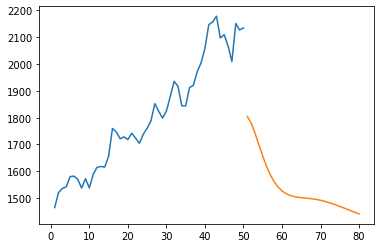

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[687:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

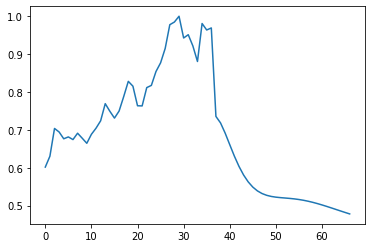

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[700:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

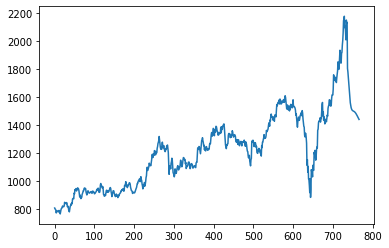

In [ ]:
plt.plot(df3)